# Sterotypes, meet data

Here we gping to analyse the results of the latest stackexchange developer survey, and compare some of the responses to the economic stats from the CIA World factbook 2016. Yes, this is  2 years older, but the relative sizes of national economies haven't changed much in 2 years.

In [1]:
#get the kivraries we will use
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# 1. Business Understanding

## CIA Factbook

The CIA factbook is a set of public statistics about the countries of the world. It comes in 2 files `categories` and `factbook`. The former is a key to the column names in the latter

In [2]:
# read the CIA categories
column_index = pd.read_csv('./factbook/categories.csv')
print ('Total categries', column_index.size)
column_index.head()

Total categries 222


,Num,Category,Name
0,2147,Geography,Area
1,2119,People and Society,Population
2,2002,People and Society,Population growth rate
3,2054,People and Society,Birth rate
4,2066,People and Society,Death rate


In [3]:
# this function constructs a dataframe with only our categories of interest
#   data from https://github.com/thewiremonkey/factbook.csv
from collections import defaultdict

def build_dataframe(columns, column_index):
    """Build a datframe given the list of columns
    
        Params:
        columns: list of strings; the names of the columns needed
        column_index: list of strings; the columns of the original dataset
    """
    out = defaultdict(lambda: {})
    column_index = pd.read_csv('./factbook/categories.csv')
    for col in columns:
        category_idx = column_index['Name'].str.find(col)
        data_id = column_index[category_idx == 0].iloc[0]['Num']
        print(col,'->', data_id)
        data = pd.read_csv(f'./factbook/data/c{data_id}.csv')
        for index, row in data.iterrows():
            name = row['Name']
            out[name][col] = row['Value']    
    return pd.DataFrame.from_dict(out)

Some categories to look at include

- Population
- Net migration rate
- Education expenditures
- Unemployment, youth ages 15-24
- GDP - per capita (PPP)
- GDP (purchasing power parity)
- Unemployment rate
- Military expenditures



In [4]:
cia = build_dataframe(
    [
        'Population',
        'Net migration rate',
        'Education expenditures',
        'Unemployment, youth ages 15-24',
        'GDP - per capita (PPP)',
        'GDP (purchasing power parity)',
        'Unemployment rate',
        'Military expenditures'
    ],
    column_index).transpose()
cia.index.name = 'Country'
cia.reset_index(inplace=True)
cia.head()

Population -> 2119
Net migration rate -> 2112
Education expenditures -> 2206
Unemployment, youth ages 15-24 -> 2229
GDP - per capita (PPP) -> 2004
GDP (purchasing power parity) -> 2001
Unemployment rate -> 2129
Military expenditures -> 2034


,Country,Education expenditures,GDP (purchasing power parity),GDP - per capita (PPP),Military expenditures,Net migration rate,Population,Unemployment rate,"Unemployment, youth ages 15-24"
0,China,NaN,$17630000000000,$12900,1.99,-0.44,1367485388,4.1,NaN
1,India,3.2,$7277000000000,$5800,2.4,-0.04,1251695584,8.6,10.7
2,European Union,NaN,$17610000000000,$38300,1.65,NaN,513949445,10,NaN
3,United States,5.4,$17460000000000,$54800,4.35,3.86,321368864,6.2,17.3
4,Indonesia,2.8,$2554000000000,$10200,0.78,-1.16,255993674,5.7,22.2


Text(0,0.5,'US$')

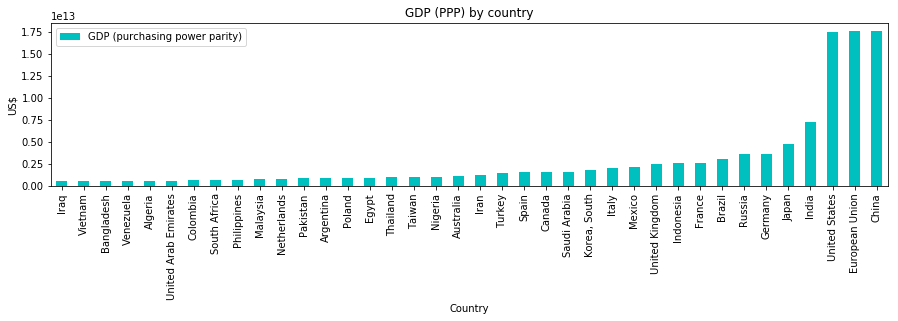

In [24]:
gdp = cia.copy()
gdp_col = 'GDP (purchasing power parity)'
gdp[gdp_col] = gdp[gdp_col].str.replace('$','')
gdp[gdp_col] = gdp[gdp_col].astype('float')
gdp = gdp[gdp[gdp_col] > 5e11]
gdp = gdp.sort_values(by=[gdp_col])
gdp[['Country', gdp_col]].plot.bar(figsize=(15,3), rot=90,  color='c', title="GDP (PPP) by country", x='Country').set_ylabel('US$')

## The Stackexchange survey.

The Stackexchange survey also comes over 2 files: `2018_schema` and `2018_results`.

In [5]:
#read the schema
schema = pd.read_csv('./2018/2018_schema.csv')
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


In [6]:
# read in the survey results
results = pd.read_csv('./2018/2018_results.csv', thousands=',')
print(results.shape)
results.head()

(98855, 129)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# 2. Data Understanding

We will ask a few questions designed to uncover the validity or otherwise of certain stereotypes that are common in some parts of social media.

Stereotypes to analyse:

- poor countries are less ethical
- more men work in tech than women
- developers in poor countries work harder
- the developing world is younger
- immigrants cost the economy

Questions we will ask:

Is there a pattern in the correlation between the following and the economic data, represented by the average national salary
- EthicsReport
- SkipMeals
- HoursComputer
- Gender
- Age
- Self reported ethical approach



### Join
Join the two datasets, so we are adding  the CIA data to each survey row, joined on country.

Note it might turn out that we could join after averaging, but this is not clear yet.


In [8]:

results.groupby('Country')['ConvertedSalary'].mean().head()

Country
Afghanistan     62757.857143
Albania         23347.638889
Algeria         23676.538462
Andorra        525089.500000
Angola                   NaN
Name: ConvertedSalary, dtype: float64

In [9]:
joint = pd.merge(results, cia, on='Country')
print(joint.shape)

(93318, 137)


In [10]:
joint.head()


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,SurveyTooLong,SurveyEasy,Education expenditures,GDP (purchasing power parity),GDP - per capita (PPP),Military expenditures,Net migration rate,Population,Unemployment rate,"Unemployment, youth ages 15-24"
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,The survey was an appropriate length,Very easy,6.7,$134700000000,$3100,1.96,-0.22,45925301,40,NaN
1,1649,Yes,Yes,Kenya,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Fewer than 10 employees,Back-end developer;DevOps specialist;System ad...,...,The survey was an appropriate length,Somewhat easy,6.7,$134700000000,$3100,1.96,-0.22,45925301,40,NaN
2,3037,Yes,Yes,Kenya,No,Employed full-time,Associate degree,Web development or web design,Fewer than 10 employees,Full-stack developer,...,The survey was an appropriate length,Neither easy nor difficult,6.7,$134700000000,$3100,1.96,-0.22,45925301,40,NaN
3,3135,Yes,Yes,Kenya,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;DevOps specialist;Full-stac...,...,The survey was too long,Neither easy nor difficult,6.7,$134700000000,$3100,1.96,-0.22,45925301,40,NaN
4,3864,Yes,Yes,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Fewer than 10 employees,Back-end developer;Data scientist or machine l...,...,The survey was an appropriate length,Neither easy nor difficult,6.7,$134700000000,$3100,1.96,-0.22,45925301,40,NaN


In [11]:
# how many Indian results in the original stackexchange data?
results[results.Country=='India'].shape

(13721, 129)

In [12]:
# how many Indian results in the final results?
joint[joint.Country=='India'].shape

(13721, 137)

In [13]:
# total size of the joint results
joint.shape

(93318, 137)

# 3. Data Praparation

### Start cleaning the data

In [14]:
# drop results with no Salary - this is our main variable to be correlated with
joint[['Salary', 'ConvertedSalary']].dropna().astype('float').size

91550

In [15]:
# so we retain what percentage?
print(f"We retain {joint[['Salary', 'ConvertedSalary']].dropna().astype('float').size * 10000 / joint.size:.2f}% if we drop NaN salaries")


We retain 71.61% if we drop NaN salaries


In [16]:
joint[['ConvertedSalary']].dropna().groupby(results['Country']).describe().head()


ConvertedSalary                                                  \
                      count           mean            std      min      25%   
Country                                                                       
Afghanistan            22.0   70856.272727  100077.549785      0.0  35661.0   
Albania                35.0  141796.371429  279855.828460      0.0  22590.0   
Algeria                50.0  101153.520000  308383.176881      0.0   8382.0   
Andorra                 6.0   39497.166667   28086.993477   1000.0  17523.5   
Angola                  5.0   39851.000000   21706.767032  15192.0  23199.0   

                                           
                 50%       75%        max  
Country                                    
Afghanistan  50869.0  63916.50   500052.0  
Albania      56892.0  86733.50  1242000.0  
Algeria      34890.0  62672.25  2000000.0  
Andorra      47734.0  61605.00    66833.0  
Angola       36716.0  61118.00    63030.0

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
joint.shape

(93318, 137)

## Converting 

In [21]:
results[['EthicsReport',
    'SkipMeals',
    'HoursComputer',
    'Gender',
    'Age']].head()

,EthicsReport,SkipMeals,HoursComputer,Gender,Age
0,"Yes, and publicly",Never,9 - 12 hours,Male,25 - 34 years old
1,Depends on what it is,Never,5 - 8 hours,Male,35 - 44 years old
2,NaN,NaN,NaN,NaN,NaN
3,"Yes, but only within the company",3 - 4 times per week,9 - 12 hours,Male,35 - 44 years old
4,"Yes, but only within the company",Never,Over 12 hours,Male,18 - 24 years old


### EthicsRport

Convert responses to the question `Do you report or otherwise call out the unethical code in question?
` into a number, 

- No -> 0
- Depends on what it is -> 1, 
- Yes, but only within the company -> 2
- Yes, and publicly -> 3

In [22]:
joint.EthicsReport.head()

0        Yes, and publicly
1    Depends on what it is
2    Depends on what it is
3    Depends on what it is
4    Depends on what it is
Name: EthicsReport, dtype: object

In [23]:
ethics_mapping = {'No': 0, 'Depends on what it is': 1, 'Yes, but only within the company':2, 'Yes, and publicly': 3}
joint.replace({'EthicsReport': ethics_mapping}, inplace=True)
joint.EthicsReport.head()

0    3.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: EthicsReport, dtype: float64

### Skipping Meals

In response to the question `In a typical week, how many times do you skip a meal in order to be more productive?`

In [24]:
joint.SkipMeals.value_counts()

Never                        43880
1 - 2 times per week         17166
3 - 4 times per week          4041
Daily or almost every day     3509
Name: SkipMeals, dtype: int64

In [25]:
skip_meals_mapping = {'Never': 0, '1 - 2 times per week': 2, '3 - 4 times per week':4, 'Daily or almost every day': 5}
joint.replace({'SkipMeals': skip_meals_mapping}, inplace=True)
joint.SkipMeals.head()

0    0.0
1    2.0
2    0.0
3    2.0
4    4.0
Name: SkipMeals, dtype: float64

### Hours on a Computer

The question: `On a typical day, how much time do you spend on a desktop or laptop computer?`

In [26]:
joint.HoursComputer.value_counts()

9 - 12 hours        36164
5 - 8 hours         21257
Over 12 hours        8965
1 - 4 hours          2214
Less than 1 hour      163
Name: HoursComputer, dtype: int64

We will map as follows:

- Less than 1 hour -> 1
- 1 - 4 hours -> 4
- 5 - 8 hours -> 8
- 9 - 12 hours -> 12
- Over 12 hours -> 16 

In [27]:
hours_computer_mapping = {'Less than 1 hour': 1, '1 - 4 hours':4, '5 - 8 hours':8, '9 - 12 hours': 12, 'Over 12 hours': 16}
joint.replace({'HoursComputer': hours_computer_mapping}, inplace=True)
joint.HoursComputer.head()

0    12.0
1    12.0
2    12.0
3    16.0
4    16.0
Name: HoursComputer, dtype: float64

### Gender

We will limit the analysis to the ratio of male to female. It would of course be interesting to look at the ration of trans-varous to male, but these are not comparable values. The simplistic model is to use `male` or `female`, whichever appears first in the response

In [28]:
joint.Gender.value_counts()

Male                                                                         56730
Female                                                                        3847
Non-binary, genderqueer, or gender non-conforming                              266
Female;Transgender                                                             142
Male;Non-binary, genderqueer, or gender non-conforming                         125
Transgender                                                                     97
Female;Male                                                                     88
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Non-binary, genderqueer, or gender non-conforming                        50
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       46
Male;Transgender                                                                27
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            24
Fema

In [29]:
def gender_to_num(gender):
    try:
        if gender.find('Male') == 0:
            return 0
        if gender.find('Female') == 0:
            return 1
    except:
        pass
    return None

joint['GenderNum'] = joint.apply (lambda row: gender_to_num (row.Gender),axis=1)

### Age

In [30]:
joint.Age.value_counts()

25 - 34 years old     30136
18 - 24 years old     14414
35 - 44 years old     11120
45 - 54 years old      3253
Under 18 years old     1541
55 - 64 years old       950
65 years or older       172
Name: Age, dtype: int64

We will map as follows

- Under 18 years old -> 18
- 18 - 24 years old -> 24
- 25 - 34 years old -> 34
- 35 - 44 years old -> 44
- 45 - 54 years old -> 54
- 55 - 64 years old -> 64 
- 65 years or older -> 74 

In [31]:
age_mapping = {
    'Under 18 years old': 18,
    '18 - 24 years old': 24,
    '25 - 34 years old': 34,
    '35 - 44 years old': 44,
    '45 - 54 years old': 54,
    '55 - 64 years old': 66,
    '65 years or older': 74
}
joint.replace({'Age': age_mapping}, inplace=True)
joint.Age.head()

0    34.0
1    34.0
2    24.0
3    34.0
4    34.0
Name: Age, dtype: float64

### Outliers

In [32]:
# get rid of outliers and small data sets
counts = joint[['Country','ConvertedSalary']].groupby('Country').count()
counts.rename(columns={'ConvertedSalary':'SalaryCount'}, inplace=True)
counts.head()

,SalaryCount
Country,
Afghanistan,7
Albania,36
Algeria,26
Andorra,4
Angola,0


,SalaryCount
Country,
Peru,40
Saudi Arabia,43
Dominican Republic,44
Bosnia and Herzegovina,46
Kazakhstan,47


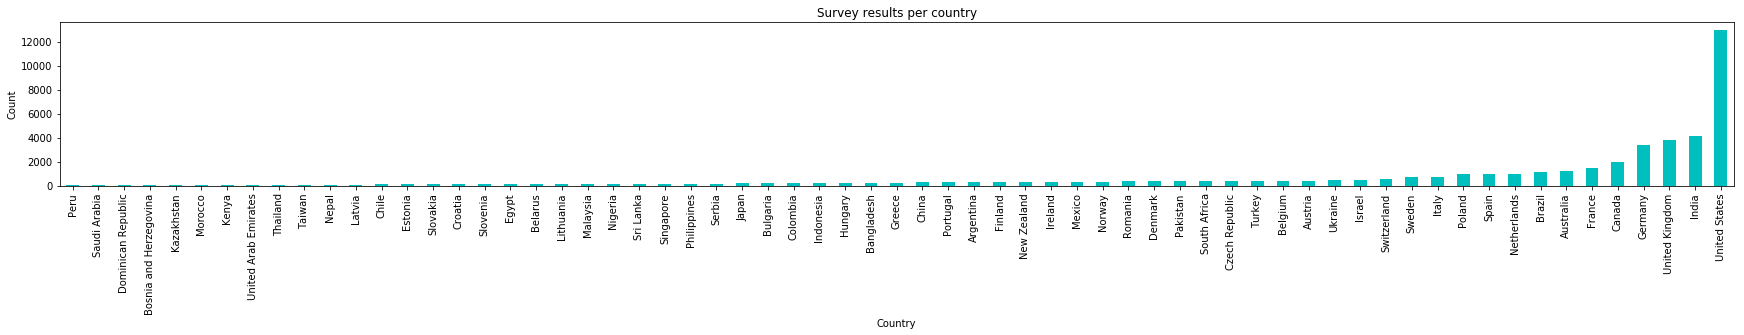

In [118]:
# we will ignore countries below this numbe of results
min_results = 40
counts[counts.SalaryCount >= min_results].sort_values(by=['SalaryCount']).SalaryCount.plot.bar(figsize=(30,3), rot=90,  color='c', title='Survey results per country').set_ylabel('Count')
counts[counts.SalaryCount >= min_results].sort_values(by=['SalaryCount']).head()

In [119]:
no_small_countries = joint[joint.Country.isin(counts.index[counts.SalaryCount > min_results])]

In [120]:
no_small_countries[no_small_countries.Country == 'United States']['ConvertedSalary'].mean()


154413.12850629783

In [121]:
#drop all rows deviating by mopre than 4 SD from the mean of their country
no_small_countries['z_score'] = no_small_countries.groupby('Country')['ConvertedSalary'].apply(lambda x: (x - x.mean())/x.std())
no_salary_outliers = no_small_countries[abs(no_small_countries['z_score']) < 4]

In [122]:
print(f"{no_salary_outliers.shape[0]/joint.shape[0]*100:.0f}% of the results dropped as salary outliers ")

47% of the results dropped as salary outliers 


Text(0,0.5,'avg. Salary US$')

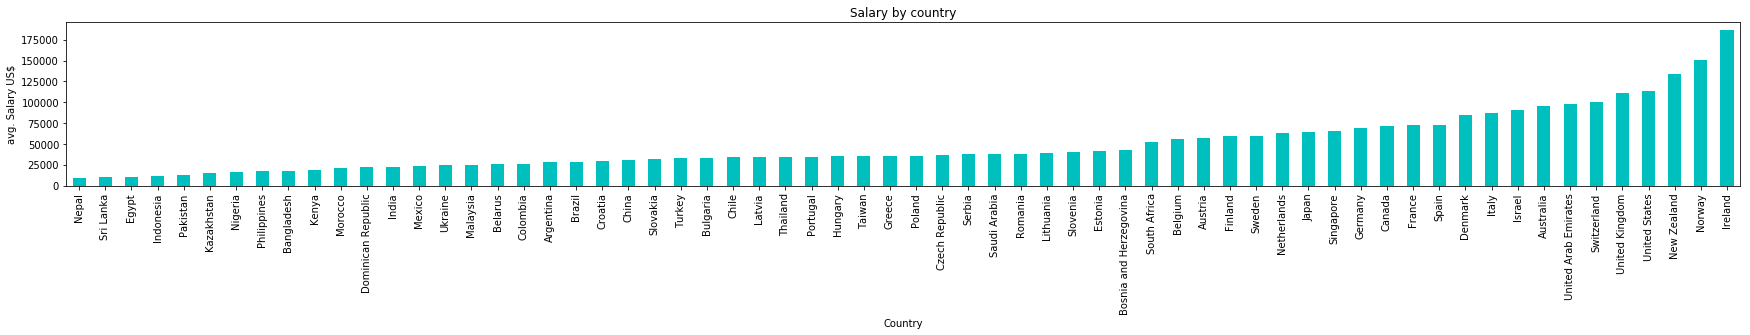

In [123]:
sals_by_country = no_salary_outliers.ConvertedSalary.dropna().groupby(no_salary_outliers.Country).mean().sort_values()

sals_by_country.plot.bar(figsize=(30,3), rot=90,  color='c', title="Salary by country").set_ylabel('avg. Salary US$')

In [124]:
def clean_numeric_column(col):
    pd.options.mode.chained_assignment = None  # daefault='warn'
    no_salary_outliers[col] = pd.to_numeric(no_salary_outliers[col])
    no_salary_outliers[col] = no_salary_outliers[col].astype('float')


# 4. Modelling

We will fit a liner regression model to each pair of columns of interest, and calculate the r2 score. We will also plot the columns against each other to visualise the result

In [97]:
#does X predict Y?
def correlate(X_column, y_column):
    """ Work out the correlation between two (numeric) columns
        
        Params: 
            X_column, y_column: string (the names of the columns)
    """
    clean = joint.copy()
    num_rows = clean.shape[0]
    clean[y_column] = clean[y_column].apply(pd.to_numeric, errors='coerce')
    if clean[X_column].dtype == 'object':
        try:
            clean[X_column] = clean[X_column].astype('float')
        except ValueError:
            clean[X_column] = clean[X_column].str.replace('$','')
            clean[X_column] = clean[X_column].astype('float')
    clean = clean.dropna(how='any', subset=[X_column, y_column])
    percent_dropped = (num_rows - clean.shape[0])/num_rows*100
    print(f"dropped {percent_dropped:.0f}%")

    X = clean.groupby('Country')[X_column].mean().values.reshape(-1,1)
    y = clean.groupby('Country')[y_column].mean()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train) #Fit
    y_test_preds = lm_model.predict(X_test) 
    print(f"The r-squared score for the model was {r2_score(y_test, y_test_preds):.4f} on {len(y_test)} values.")

In [98]:
correlate('GDP - per capita (PPP)','ConvertedSalary')

dropped 51%
The r-squared score for the model was 0.3606 on 46 values.


In [125]:
def comparison_plot(y1, y2, title, y1_label, y2_label):
    """Given 2 columns, work out the correlation and plot them on the same graph
    
    Params:
        y1, y2: string; the names of the columns
        title: string; the graph title
        y1_label, y2_label: string; the axes labels
    """
    clean_numeric_column(y1)
    clean_numeric_column(y2)
    
    correlate(y2,y1)
    df_plt =  no_salary_outliers[[y1, y2]].dropna().groupby(no_salary_outliers['Country']).mean().sort_values(by=[y1])

    df_plt[y1].plot.bar(figsize=(30,3), rot=90,  color='c', title=title).set_ylabel(y1_label)
    df_plt[y2].plot(secondary_y=True, rot=90, color='r').set_ylabel(y2_label)

dropped 53%
The r-squared score for the model was 0.1251 on 46 values.


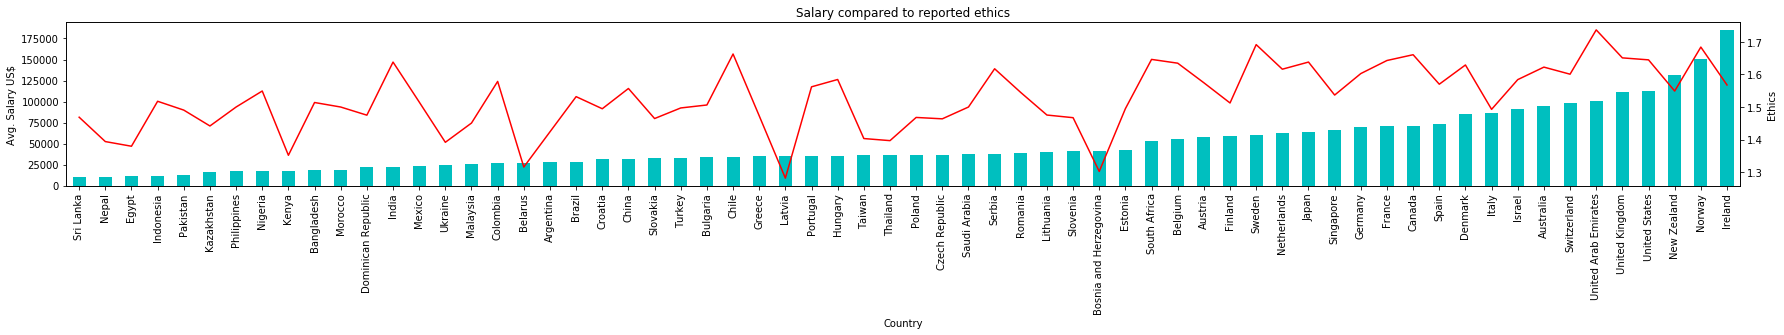

In [126]:
comparison_plot(y1='ConvertedSalary',  y2='EthicsReport', title='Salary compared to reported ethics', y1_label='Avg. Salary US$', y2_label='Ethics')

dropped 51%
The r-squared score for the model was 0.1494 on 46 values.


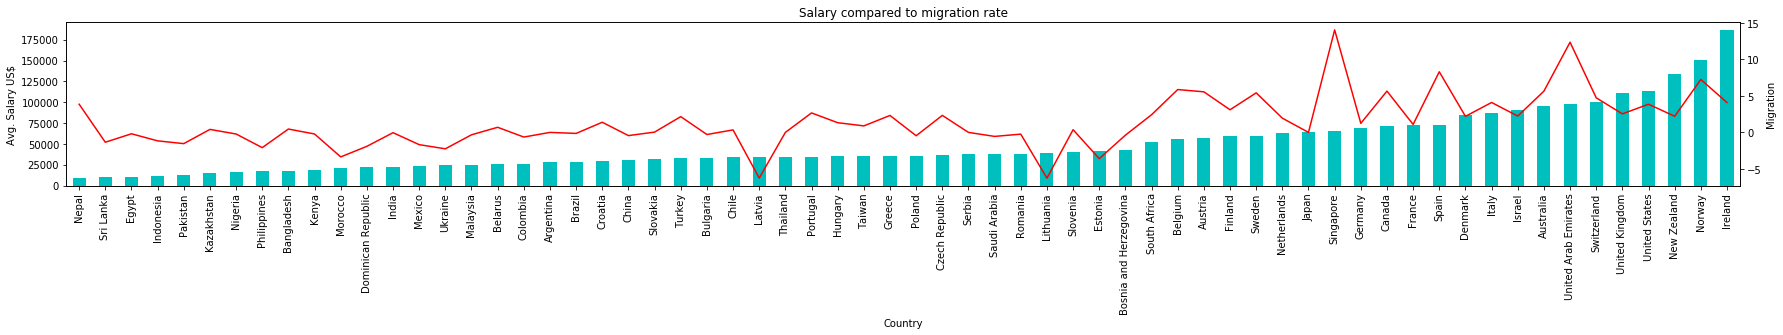

In [127]:
comparison_plot(y1='ConvertedSalary',  y2='Net migration rate', title='Salary compared to migration rate', y1_label='Avg. Salary US$', y2_label='Migration')

dropped 52%
The r-squared score for the model was -0.0543 on 36 values.


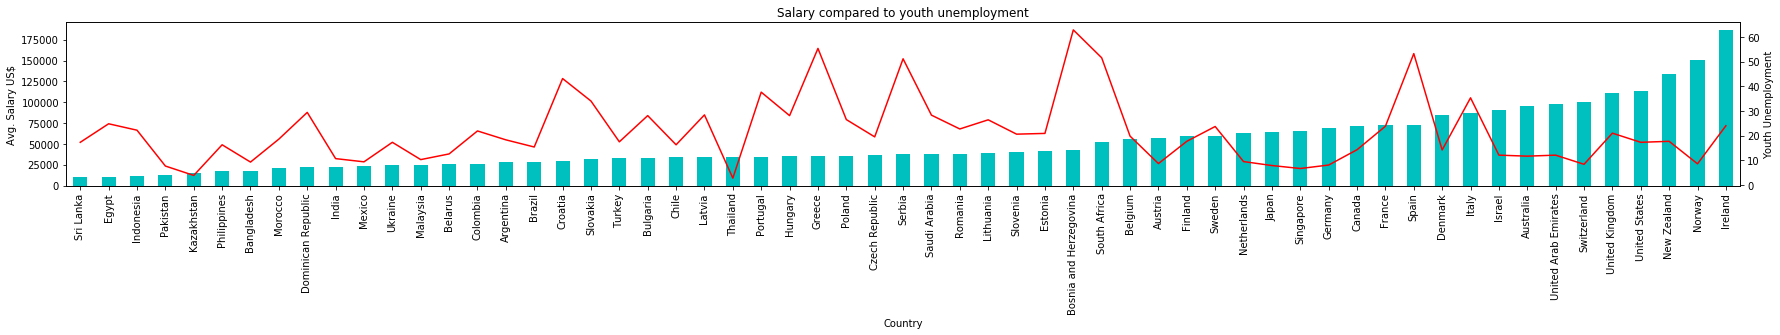

In [129]:
comparison_plot(y1='ConvertedSalary',  y2='Unemployment, youth ages 15-24', title='Salary compared to youth unemployment', y1_label='Avg. Salary US$', y2_label='Youth Unemployment')

dropped 52%
The r-squared score for the model was -0.0251 on 41 values.


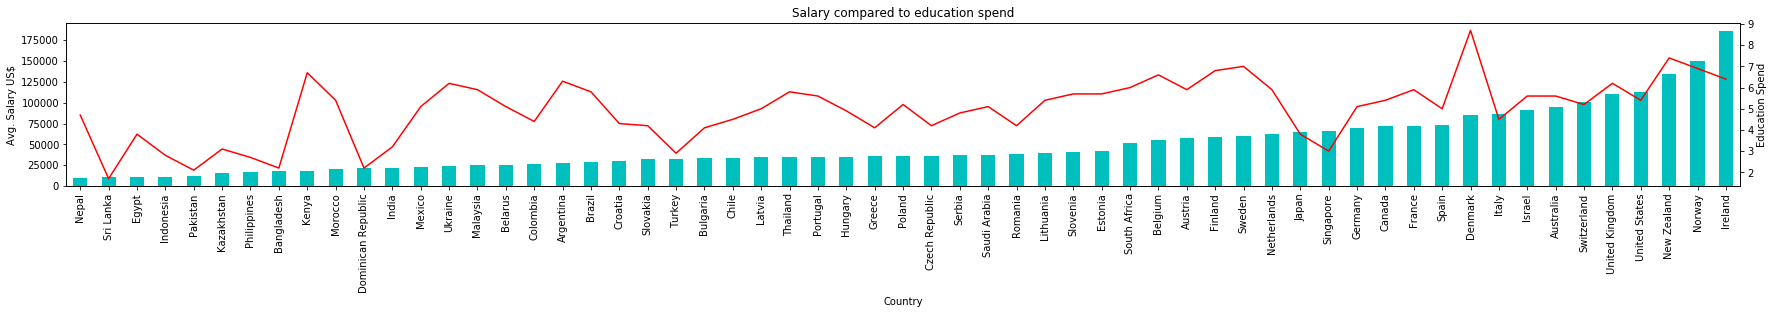

In [130]:
comparison_plot(y1='ConvertedSalary',  y2='Education expenditures', title='Salary compared to education spend', y1_label='Avg. Salary US$', y2_label='Education Spend')

dropped 54%
The r-squared score for the model was -0.0055 on 46 values.


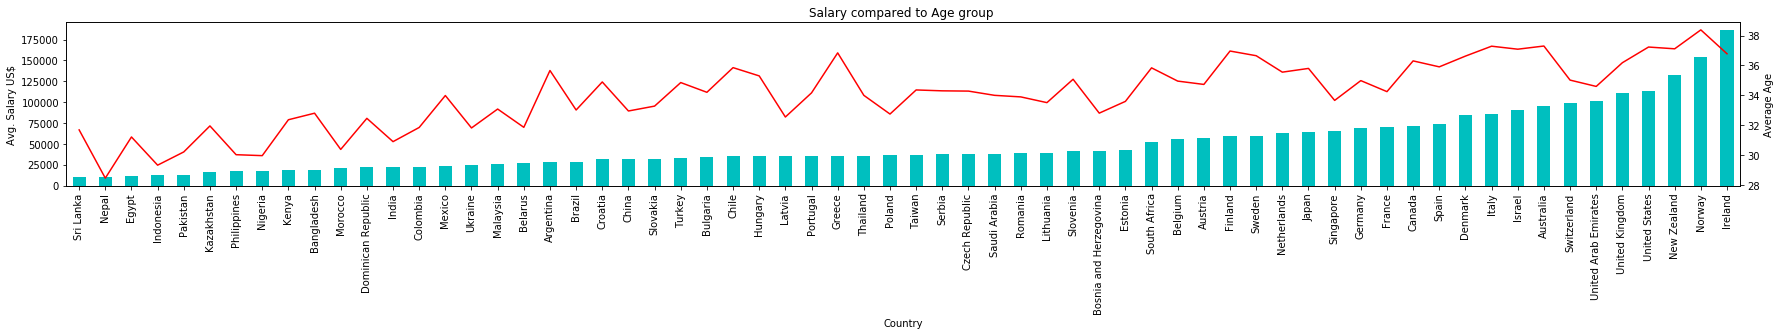

In [131]:
comparison_plot(y1='ConvertedSalary',  y2='Age', title='Salary compared to Age group ', y1_label='Avg. Salary US$', y2_label='Average Age')

dropped 54%
The r-squared score for the model was -0.0502 on 46 values.


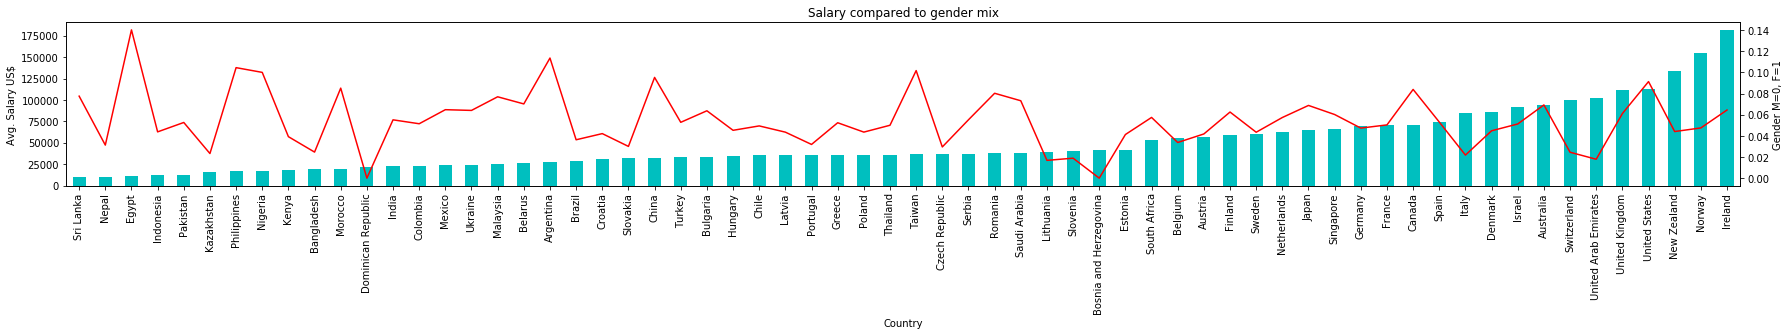

In [137]:
comparison_plot(y1='ConvertedSalary',  y2='GenderNum', title='Salary compared to gender mix', y1_label='Avg. Salary US$', y2_label='Gender M=0, F=1')

dropped 53%
The r-squared score for the model was -0.0048 on 46 values.


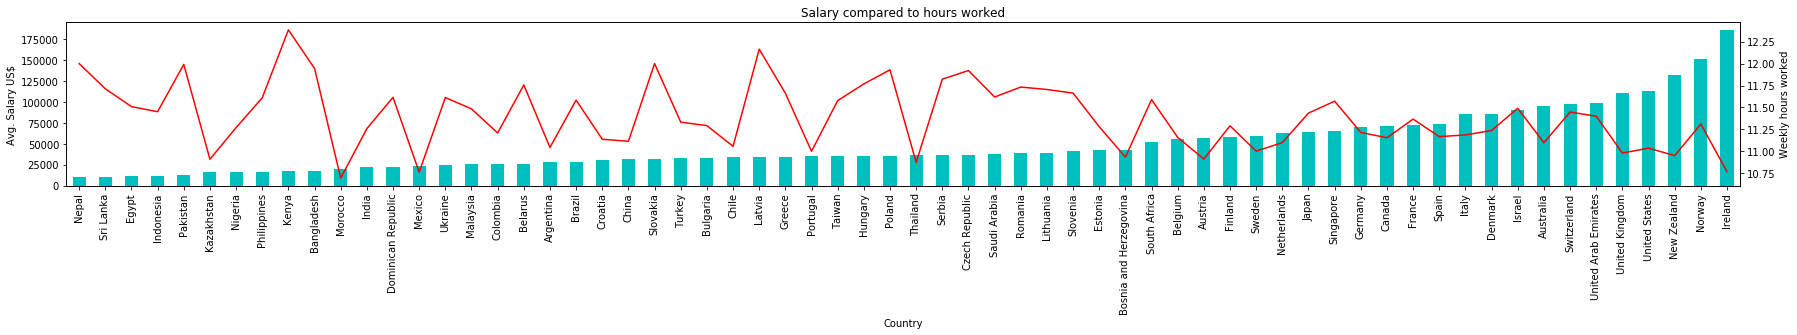

In [133]:
comparison_plot(y1='ConvertedSalary',  y2='HoursComputer', title='Salary compared to hours worked', y1_label='Avg. Salary US$', y2_label='Weekly hours worked')

dropped 53%
The r-squared score for the model was -0.0034 on 46 values.


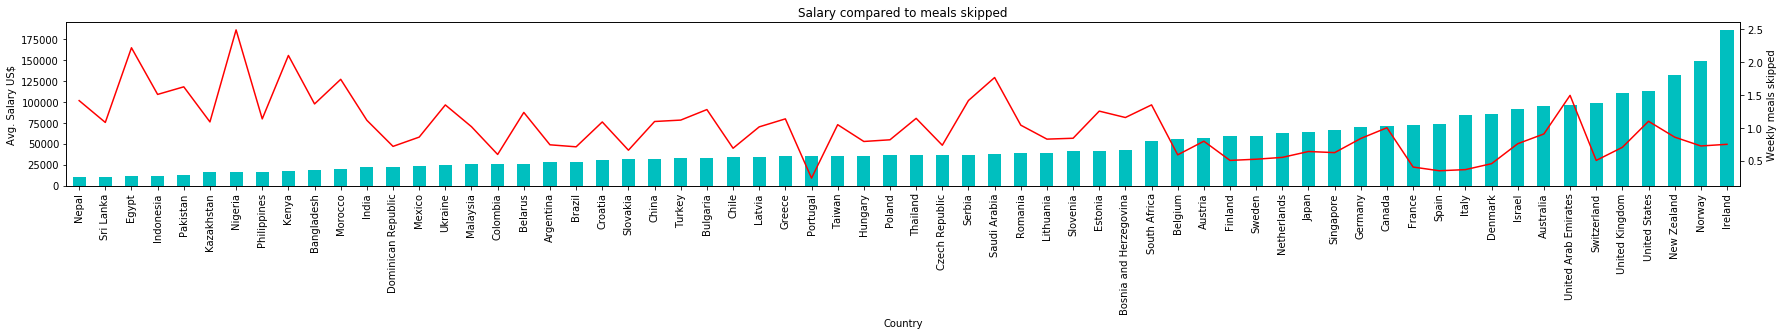

In [134]:
comparison_plot(y1='ConvertedSalary',  y2='SkipMeals', title='Salary compared to meals skipped', y1_label='Avg. Salary US$', y2_label='Weekly meals skipped')

# 5. Evaluation

The results do not support the existence of any strong correlation between the dataset pairs chosen. In other words, the stereotypes are ill-founded, at least as applied to stackexchange users.